In [1]:
import requests
import pandas as pd

file_url = 'https://raw.githubusercontent.com/ani-exe/simple_ao3_scraper/main/outfile.json'
data = requests.get(file_url).json()
data = data['data']
df = pd.DataFrame(data)
df.dtypes

title               object
author              object
isAnon                bool
isOrphan              bool
id                  object
rating              object
warnings            object
category            object
isWip                 bool
lastUpdated         object
relationships       object
isSlash               bool
freeforms           object
summary             object
isSeries              bool
seriesMeta          object
language            object
words                int64
currentChapters      int64
intendedChapters    object
kudos                int64
hits                 int64
comments             int64
bookmarks            int64
collections          int64
dtype: object

In [2]:
df

,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,seriesMeta,language,words,currentChapters,intendedChapters,kudos,hits,comments,bookmarks,collections
0,Late night texting,cpn86457,False,False,/works/47353927,Explicit,[Choose Not To Use Archive Warnings],[M/M],False,22 May 2023,...,[],English,1005,1,1,26,147,4,2,0
1,Hollow: A Demon!Serizawa Story,Ace_in_the_Hole,False,False,/works/46349863,Mature,[No Archive Warnings Apply],[M/M],True,22 May 2023,...,[],English,46761,19,?,168,3062,51,22,0
2,Show them who's boss,fallenangel0666,False,False,/works/47351500,General Audiences,[Choose Not To Use Archive Warnings],[F/M],False,22 May 2023,...,[],English,2361,1,1,2,22,0,0,0
3,"The Ghost, the Girl, and the Little Death",La_Marionnette_Grotesque,False,False,/works/47303989,Explicit,[Underage],[F/M],False,22 May 2023,...,[],English,6337,1,1,7,61,2,2,0
4,Our Dirty Fingers,madburnishing,False,False,/works/37914952,Explicit,"[Choose Not To Use Archive Warnings, Graphic D...",[M/M],True,22 May 2023,...,[],English,12147,22,?,60,1111,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,Double Team Tactic,orphan_account,False,True,/works/5782909,Mature,[Underage],[M/M],False,22 Jan 2016,...,[],English,5281,1,1,792,12713,41,62,0
7077,1,slutreigen (pleasejustno),False,False,/works/5613691,General Audiences,[No Archive Warnings Apply],[No category],False,02 Jan 2016,...,"[{'installment': 1, 'seriesId': '/series/38039...",English,356,1,1,206,2225,15,5,0
7078,Brother's Keeper,allthingsunrelated,False,False,/works/5239292,Not Rated,[Choose Not To Use Archive Warnings],[Gen],False,18 Nov 2015,...,[],English,1722,1,1,252,1934,7,43,0
7079,senses,ekubo (apurochi),False,False,/works/2535437,Teen And Up Audiences,[Underage],[M/M],False,30 Oct 2014,...,[],English,266,1,1,172,2788,5,5,1


In [3]:
# kudos / hits can be useful for another view (altho favors newer works & oneshots)
# versus overall stats which favors multichap & older
# wonder what the balance would be here.

df = df.assign(kudos_per_hits = df.kudos / df.hits)
df = df.assign(bookmarks_per_kudos = df.bookmarks / df.kudos)
df['lastUpdated'] = pd.to_datetime(df['lastUpdated']).apply(lambda x: x.strftime('%Y-%m-%d')if not pd.isnull(x) else '')
df['date'] = pd.to_datetime(df['lastUpdated'])
df['rating'] = df['rating'].str[:1]
df['rating'] = pd.Categorical(df['rating'], ['G', 'T', 'M', 'E', 'N'])

df = df.assign(numSeries = df['seriesMeta'].str.len())
df

,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,intendedChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,date,numSeries
0,Late night texting,cpn86457,False,False,/works/47353927,E,[Choose Not To Use Archive Warnings],[M/M],False,2023-05-22,...,1,26,147,4,2,0,0.176871,0.076923,2023-05-22,0
1,Hollow: A Demon!Serizawa Story,Ace_in_the_Hole,False,False,/works/46349863,M,[No Archive Warnings Apply],[M/M],True,2023-05-22,...,?,168,3062,51,22,0,0.054866,0.130952,2023-05-22,0
2,Show them who's boss,fallenangel0666,False,False,/works/47351500,G,[Choose Not To Use Archive Warnings],[F/M],False,2023-05-22,...,1,2,22,0,0,0,0.090909,0.000000,2023-05-22,0
3,"The Ghost, the Girl, and the Little Death",La_Marionnette_Grotesque,False,False,/works/47303989,E,[Underage],[F/M],False,2023-05-22,...,1,7,61,2,2,0,0.114754,0.285714,2023-05-22,0
4,Our Dirty Fingers,madburnishing,False,False,/works/37914952,E,"[Choose Not To Use Archive Warnings, Graphic D...",[M/M],True,2023-05-22,...,?,60,1111,6,6,0,0.054005,0.100000,2023-05-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7076,Double Team Tactic,orphan_account,False,True,/works/5782909,M,[Underage],[M/M],False,2016-01-22,...,1,792,12713,41,62,0,0.062298,0.078283,2016-01-22,0
7077,1,slutreigen (pleasejustno),False,False,/works/5613691,G,[No Archive Warnings Apply],[No category],False,2016-01-02,...,1,206,2225,15,5,0,0.092584,0.024272,2016-01-02,1
7078,Brother's Keeper,allthingsunrelated,False,False,/works/5239292,N,[Choose Not To Use Archive Warnings],[Gen],False,2015-11-18,...,1,252,1934,7,43,0,0.130300,0.170635,2015-11-18,0
7079,senses,ekubo (apurochi),False,False,/works/2535437,T,[Underage],[M/M],False,2014-10-30,...,1,172,2788,5,5,1,0.061693,0.029070,2014-10-30,0


In [4]:
df.describe()
df[df['kudos'] > 100].sort_values(by='bookmarks_per_kudos', ascending=False)

,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,intendedChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,date,numSeries
443,Interpretation as a Creative Act,ghostwriterofthemachine,False,False,/works/45753190,T,[No Archive Warnings Apply],[Gen],False,2023-03-14,...,1,174,685,26,61,0,0.254015,0.350575,2023-03-14,0
6668,tomorrow isn't always another day,suitablyskippy,False,False,/works/8877043,G,[Choose Not To Use Archive Warnings],[Gen],False,2016-12-25,...,1,5053,55937,365,1610,1,0.090334,0.318623,2016-12-25,0
1103,the twelfth annual rising sun spiritual union ...,toyotas,False,False,/works/43527840,T,[No Archive Warnings Apply],[M/M],False,2022-12-25,...,5,280,3269,161,86,0,0.085653,0.307143,2022-12-25,0
56,the parachute candidate,toyotas,False,False,/works/44728306,T,[No Archive Warnings Apply],[M/M],False,2023-05-15,...,10,203,6472,219,59,0,0.031366,0.290640,2023-05-15,0
1874,Past and Future,ScarletRequiem,False,False,/works/34928611,T,"[Graphic Depictions Of Violence, No Archive Wa...",[No category],True,2022-05-13,...,?,580,13986,76,168,2,0.041470,0.289655,2022-05-13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5177,Coronation,Lady_Agave,False,False,/works/12763734,E,"[Choose Not To Use Archive Warnings, Graphic D...",[F/M],True,2018-11-14,...,?,310,2159,8,2,0,0.143585,0.006452,2018-11-14,0
5235,Detach,Janekfan,False,False,/works/16319459,T,[Choose Not To Use Archive Warnings],[Gen],False,2018-10-16,...,1,159,2226,11,1,0,0.071429,0.006289,2018-10-16,1
6892,Bitter (and other short stories),needsmoresleep,False,False,/works/8392216,E,[Choose Not To Use Archive Warnings],[M/M],True,2016-10-28,...,?,173,3624,6,1,0,0.047737,0.005780,2016-10-28,1
4280,I Listened,morosexualserizawa,False,False,/works/18688051,G,[No Archive Warnings Apply],[M/M],False,2019-05-03,...,1,110,776,3,0,0,0.141753,0.000000,2019-05-03,1


In [5]:
str_df = df
str_df['ffstring'] = [','.join(map(str, l)) for l in df['freeforms']]

<AxesSubplot:xlabel='rating'>

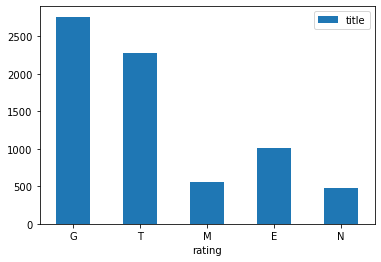

In [6]:
str_df[['title','rating']].groupby(['rating']).count().plot.bar(rot=0)

In [7]:
numeric_stats = ["words", "kudos", "hits", "comments", "bookmarks", "kudos_per_hits"]
rating_per_avg_stat = df[["rating"] + numeric_stats].groupby("rating").mean()
rating_per_avg_stat

,words,kudos,hits,comments,bookmarks,kudos_per_hits
rating,,,,,,
G,2842.076756,206.971398,1633.273353,15.129254,22.013758,0.134546
T,8276.649077,229.827177,2452.748901,33.716359,29.842568,0.109791
M,21124.549822,181.402135,2329.195730,38.500000,20.448399,0.084678
E,6351.916667,208.468254,3470.637897,17.413690,18.721230,0.061170
N,3712.113684,126.458947,1196.126316,10.926316,11.951579,0.107478


<AxesSubplot:xlabel='rating'>

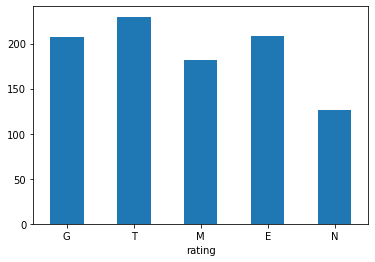

In [8]:
rating_per_avg_stat["kudos"].plot.bar(rot=0)

<AxesSubplot:xlabel='rating'>

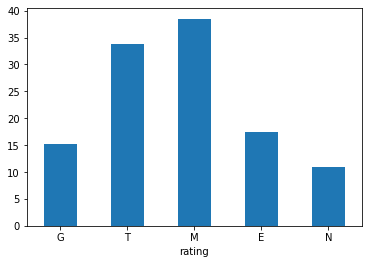

In [9]:
rating_per_avg_stat["comments"].plot.bar(rot=0)


<AxesSubplot:xlabel='rating'>

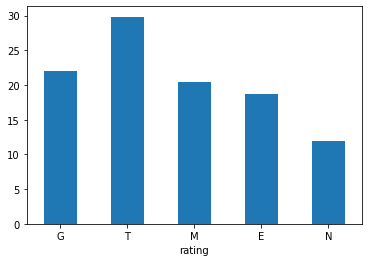

In [10]:
rating_per_avg_stat["bookmarks"].plot.bar(rot=0)


<AxesSubplot:xlabel='rating'>

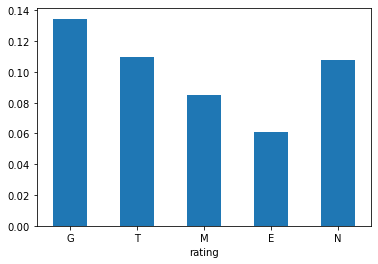

In [11]:
rating_per_avg_stat["kudos_per_hits"].plot.bar(rot=0)

<AxesSubplot:xlabel='rating'>

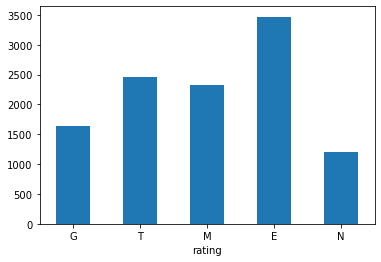

In [12]:
rating_per_avg_stat["hits"].plot.bar(rot=0)


In [13]:
# do wips do worse than completed fics?
iswip_per_avg_stat = df[["isWip"] + numeric_stats].groupby("isWip").mean()
iswip_per_avg_stat

,words,kudos,hits,comments,bookmarks,kudos_per_hits
isWip,,,,,,
False,4286.425932,215.419492,2126.390339,18.778136,23.717797,0.115394
True,18136.313294,165.502964,2471.227773,44.070279,20.972904,0.085316


In [14]:
#oneshots only
oneshot_avg_stats = df[df["intendedChapters"] == "1"]
print("mean\n")
print(oneshot_avg_stats[numeric_stats].mean())
print()
print("median\n")
print(oneshot_avg_stats[numeric_stats].median())

mean

words             2601.641371
kudos              186.095532
hits              1705.005586
comments            11.010401
bookmarks           18.455701
kudos_per_hits       0.118919
dtype: float64

median

words             1731.000000
kudos              108.000000
hits               998.000000
comments             7.000000
bookmarks            7.000000
kudos_per_hits       0.117133
dtype: float64


In [15]:
oneshot_avg_stats[oneshot_avg_stats['words'] >= 10000]

,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,date,numSeries,ffstring
11,Bob and Weave,PimpedOutGreenEars,False,False,/works/47333842,T,[No Archive Warnings Apply],[M/M],False,2023-05-21,...,21,92,1,2,0,0.228261,0.095238,2023-05-21,0,Ritsu is going for the gold in mental gymnasti...
77,"hair, paper, god",Rednevaloen (Neolavender),False,False,/works/46877650,E,"[Rape/Non-Con, Underage]",[M/M],False,2023-05-12,...,49,536,6,8,1,0.091418,0.163265,2023-05-12,0,"Bottom Reigen Arataka,Case Fic,Horror,Supernat..."
198,"cold, cold man",silvercistern,False,False,/works/46718980,M,[No Archive Warnings Apply],[F/M],False,2023-04-24,...,76,644,27,21,0,0.118012,0.276316,2023-04-24,1,"Regret,Apologies,Unlookedfor Forgiveness,recon..."
211,insert sad title here,Anonymous,True,False,/works/46666531,T,[Graphic Depictions Of Violence],[Gen],False,2023-04-22,...,13,310,0,0,1,0.041935,0.000000,2023-04-22,0,"Child Abuse,Child Death,Torture,Adoption,Multi..."
224,Rainbow Veins,BinaryDreams1010,False,False,/works/46619563,T,[No Archive Warnings Apply],[M/M],False,2023-04-20,...,266,1472,28,47,0,0.180707,0.176692,2023-04-20,0,"Post-Canon,Pre-Relationship,Developing Relatio..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6662,This feeling in my stomach won't go away,PostApocalypticLaundryPile,False,False,/works/9060952,T,[Choose Not To Use Archive Warnings],[M/M],False,2016-12-26,...,665,6339,40,79,0,0.104906,0.118797,2016-12-26,0,"awkward boys in love,Confessions,Kissing,Anxie..."
6668,tomorrow isn't always another day,suitablyskippy,False,False,/works/8877043,G,[Choose Not To Use Archive Warnings],[Gen],False,2016-12-25,...,5053,55937,365,1610,1,0.090334,0.318623,2016-12-25,0,"Time Loop,Case Fic,Hijinks & Shenanigans,Ensem..."
6677,a mountain village mystery! ~love 100%~,warfare,False,False,/works/8867635,G,[No Archive Warnings Apply],[Gen],False,2016-12-24,...,540,4549,53,153,1,0.118707,0.283333,2016-12-24,0,"Case Fic,Post-Anime,Reigen Arataka's Murder Ca..."
6806,"That's a Bummer, Dude",LossOfBrains,False,False,/works/8631211,T,[Choose Not To Use Archive Warnings],[M/M],False,2016-11-23,...,1015,11310,41,174,0,0.089744,0.171429,2016-11-23,0,"TeruMob,mobteru"


In [16]:
#multichap fics only
multichap_avg_stats = df[df["intendedChapters"] != "1"] # could be a number or a '?'
multichap_unfinished = multichap_avg_stats[multichap_avg_stats["isWip"] == True]
multichap_unfinished.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,numSeries
count,1.181000e+03,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1181.000000,1180.000000,1181.000000
mean,1.813631e+04,5.205758,165.502964,2471.227773,44.070279,20.972904,0.033023,0.085316,0.102606,0.102456
std,1.644845e+05,31.202062,441.219392,11926.022620,211.981625,88.064504,0.196822,0.036739,0.076688,0.311643
min,1.220000e+02,1.000000,0.000000,11.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.379000e+03,1.000000,32.000000,412.000000,4.000000,2.000000,0.000000,0.058671,0.056024,0.000000
50%,5.339000e+03,2.000000,76.000000,979.000000,12.000000,7.000000,0.000000,0.080692,0.096712,0.000000
75%,1.328100e+04,5.000000,173.000000,2099.000000,33.000000,18.000000,0.000000,0.107296,0.134744,0.000000
max,5.450041e+06,1058.000000,12515.000000,387030.000000,5887.000000,2705.000000,2.000000,0.280899,1.000000,2.000000


In [17]:
multichap_finished = multichap_avg_stats[multichap_avg_stats["isWip"] == False]
multichap_finished.describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,numSeries
count,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,708.000000,707.000000,708.000000
mean,16641.512712,5.759887,430.461864,5216.545198,75.741525,62.306497,0.110169,0.089539,0.107121,0.262712
std,23765.789374,6.123110,747.040452,8894.882995,153.308952,141.885208,0.514853,0.035930,0.058942,0.446795
min,232.000000,2.000000,0.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4330.500000,2.000000,95.500000,1055.750000,11.000000,7.000000,0.000000,0.063808,0.069404,0.000000
50%,8940.500000,3.000000,207.500000,2485.000000,28.000000,21.000000,0.000000,0.084891,0.103448,0.000000
75%,18474.750000,7.000000,452.750000,5400.000000,65.250000,54.000000,0.000000,0.112105,0.140989,1.000000
max,275619.000000,56.000000,8735.000000,80674.000000,1517.000000,1700.000000,8.000000,0.213592,0.307692,2.000000


<AxesSubplot:>

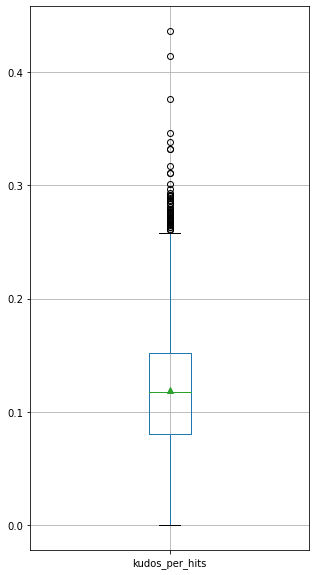

In [18]:
oneshot_avg_stats.boxplot(column=["kudos_per_hits"], figsize=(5,10), showmeans=True)

<AxesSubplot:>

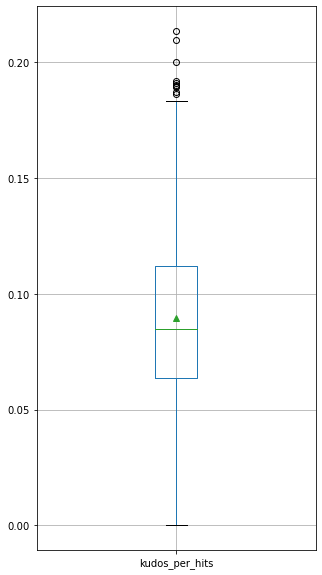

In [19]:
multichap_finished.boxplot(column=["kudos_per_hits"], figsize=(5,10), showmeans=True)


<AxesSubplot:>

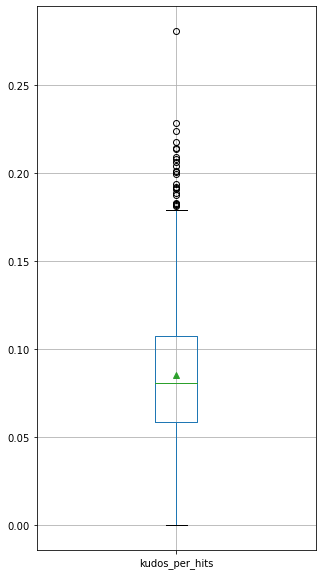

In [20]:
multichap_unfinished.boxplot(column=["kudos_per_hits"], figsize=(5,10), showmeans=True)

In [21]:
#do fics in series have more engagement?
df[df["isSeries"]].describe()

,words,currentChapters,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,numSeries
count,1.446000e+03,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000,1446.000000
mean,1.055712e+04,2.739281,221.632780,2465.248271,30.132089,20.952282,0.064315,0.104913,0.071376,1.020055
std,1.481766e+05,28.056797,343.638071,4509.764832,177.930276,56.274240,0.274673,0.041359,0.047001,0.140238
min,1.000000e+02,1.000000,2.000000,25.000000,0.000000,0.000000,0.000000,0.005294,0.000000,1.000000
25%,1.063000e+03,1.000000,66.000000,640.250000,4.000000,3.000000,0.000000,0.077560,0.040000,1.000000
50%,2.094500e+03,1.000000,127.500000,1339.000000,9.000000,8.000000,0.000000,0.102396,0.064947,1.000000
75%,4.892000e+03,1.000000,243.000000,2679.000000,19.000000,19.750000,0.000000,0.130216,0.096037,1.000000
max,5.450041e+06,1058.000000,4834.000000,66105.000000,5887.000000,1206.000000,4.000000,0.301471,0.400000,2.000000


In [22]:
# let's get the bar graph of all relationships in the tag and see if we need to fix some tags
from itertools import chain
from collections import Counter
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [20, 5]


rel_only = df[df['relationships'].str.len() > 0]
print(((rel_only['relationships'].size / df.relationships.size) *100),'% of MP100 fics contain relationship tags')

87.37466459539614 % of MP100 fics contain relationship tags


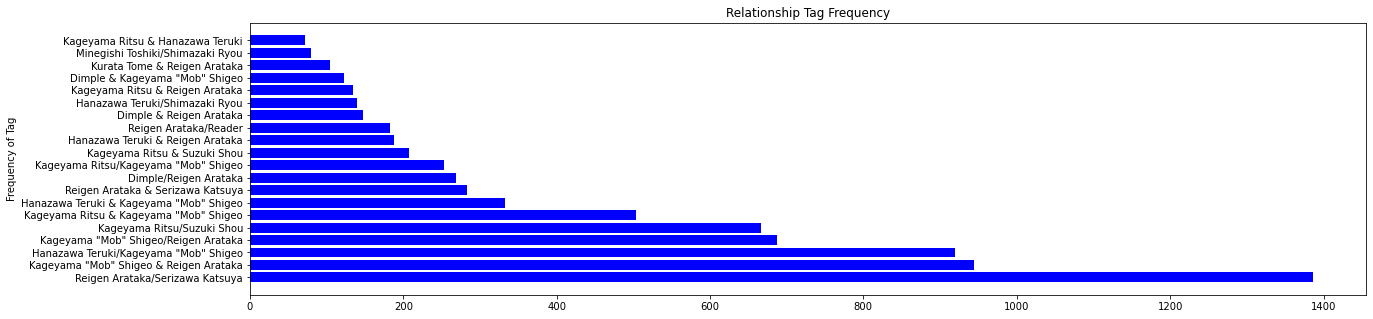

In [92]:
ls_rel = rel_only.relationships.tolist()
ctr = Counter(chain.from_iterable(ls_rel))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(20)]
x = [tag for tag, count in ctr.most_common(20)]

plt.barh(x, y, color='blue')
plt.title("Relationship Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks()
plt.show()

In [93]:
tome_only = [(tag,count) for (tag,count) in ctr.most_common(200) if "Kurata Tome" in tag]
tome_only

[('Kurata Tome & Reigen Arataka', 105),
 ('Kageyama "Mob" Shigeo & Kurata Tome', 71),
 ('Kurata Tome/Takane Tsubomi', 46),
 ('Kurata Tome & Serizawa Katsuya', 41),
 ('Hanazawa Teruki & Kurata Tome', 23),
 ('Kurata Tome/Mezato Ichi', 21),
 ('Kurata Tome & Takenaka Momozou', 10),
 ('Kurata Tome & Suzuki Shou', 10),
 ('Kageyama "Mob" Shigeo/Kurata Tome', 8),
 ('Dimple & Kurata Tome', 7),
 ('Kurata Tome/Kurosaki Rei', 7),
 ('Kurata Tome/Serizawa Katsuya', 5),
 ('Kurata Tome/Takenaka Momozou', 5),
 ('Emi & Kurata Tome', 4),
 ('Kurata Tome/Reigen Arataka', 4),
 ('Hoshida Origo/Kurata Tome', 3),
 ('Kurata Tome & Telepathy Club Members', 3),
 ('Kurata Tome/Original Female Character(s)', 3),
 ('Inukawa Mameta & Kurata Tome', 3),
 ('Kurata Tome & Her Father', 3),
 ('Hoshida Origo & Kurata Tome', 2)]

In [80]:
# most shipped characters
ls_rel_split = []
ls_rel_and = []
ls_rel_slash = []
for l in ls_rel:
    for s in l:
        if '&' in s:
            split = s.split('&')
            ls_rel_split += split
            ls_rel_and += split
        else:
            split = s.split('/')
            ls_rel_split += split
            ls_rel_slash += split
    
ls_rel_split = [l.strip() for l in ls_rel_split]
ls_rel_and = [l.strip() for l in ls_rel_and]
ls_rel_slash = [l.strip() for l in ls_rel_slash]
ls_rel_split

['Kageyama "Mob" Shigeo',
 'Reigen Arataka',
 'Reigen Arataka',
 'Serizawa Katsuya',
 'Kageyama "Mob" Shigeo',
 'Reader',
 'Body Improvement Club Members',
 'Kageyama "Mob" Shigeo',
 'Dimple',
 'Kageyama "Mob" Shigeo',
 'Kageyama "Mob" Shigeo',
 'Reigen Arataka',
 'Dimple',
 'Kageyama "Mob" Shigeo',
 'Kageyama "Mob" Shigeo',
 'Reigen Arataka',
 'Hanazawa Teruki',
 'Shimazaki Ryou',
 'Hanazawa Teruki',
 'Suzuki Touichirou',
 'Reigen Arataka',
 'Reader',
 'Reigen Arataka',
 'Serizawa Katsuya',
 'Reigen Arataka',
 'Serizawa Katsuya',
 'Dimple',
 'Reigen Arataka',
 'Dimple',
 'Reigen Arataka',
 'Reigen Arataka',
 'Serizawa Katsuya',
 'Kageyama "Mob" Shigeo',
 'Suzuki Shou',
 'Kageyama "Mob" Shigeo',
 'Suzuki Touichirou',
 'Suzuki Shou',
 'Suzuki Touichirou',
 'Suzuki Shou',
 'His Mother',
 'Minegishi Toshiki',
 'Shimazaki Ryou',
 'Kageyama Ritsu',
 'Suzuki Shou',
 'Kageyama "Mob" Shigeo',
 'Shimazaki Ryou',
 'Shibata Hiroshi',
 'Tsuchiya',
 'Kageyama "Mob" Shigeo',
 'Serizawa Katsuya',
 'K

In [87]:
ctr = Counter(chain(ls_rel_split))
ctr.most_common(50)



[('Reigen Arataka', 4907),
 ('Kageyama "Mob" Shigeo', 4514),
 ('Kageyama Ritsu', 2180),
 ('Serizawa Katsuya', 2147),
 ('Hanazawa Teruki', 1929),
 ('Suzuki Shou', 1248),
 ('Dimple', 770),
 ('Kurata Tome', 404),
 ('Reader', 343),
 ('Shimazaki Ryou', 302),
 ('Suzuki Touichirou', 177),
 ('Takane Tsubomi', 169),
 ('Takenaka Momozou', 151),
 ('Minegishi Toshiki', 125),
 ('Original Character(s)', 96),
 ('Claw Security Guard', 94),
 ('Mogami Keiji', 89),
 ('Gouda Musashi', 64),
 ("Kageyama Siblings' Parents", 63),
 ('Emi', 63),
 ('No Romantic Relationship(s)', 62),
 ('Asagiri Minori', 56),
 ('His Mother', 50),
 ('Everyone', 50),
 ('Mezato Ichi', 47),
 ('Other(s)', 42),
 ('Kamuro Shinji', 40),
 ('*q**q**q*', 31),
 ('Minor or Background Relationship(s)', 30),
 ('Onigawara Tenga', 28),
 ('Original Female Character(s)', 26),
 ('Dimple (Mob Psycho 100)', 25),
 ('Hatori Nozomu', 21),
 ('*q**q**q* (Mob Psycho 100)', 19),
 ('None', 18),
 ('Koyama Megumu', 17),
 ('Sakurai Yuusuke', 17),
 ('Inukawa Mame

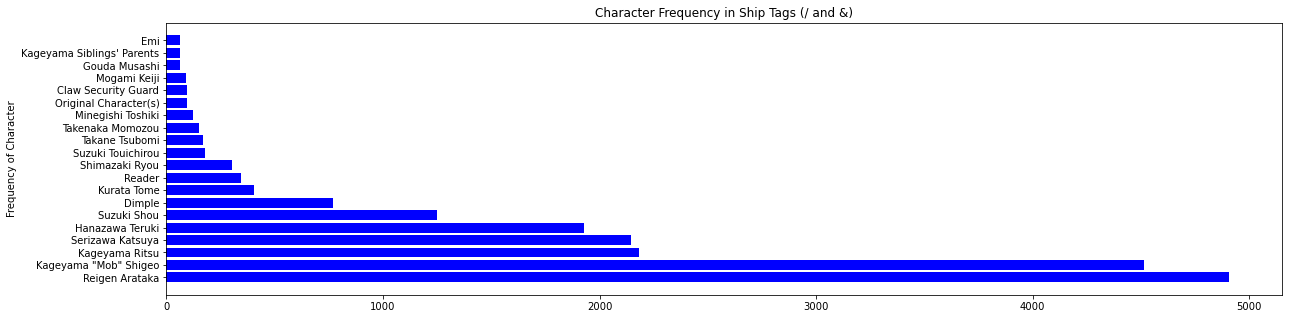

In [88]:
y = [count for tag, count in ctr.most_common(20)]
x = [tag for tag, count in ctr.most_common(20)]

plt.barh(x, y, color='blue')
plt.title("Character Frequency in Ship Tags (/ and &)")
plt.ylabel("Frequency of Character")
plt.xticks()
plt.show()

In [85]:
# & only

ctr = Counter(chain(ls_rel_and))
ctr.most_common(50)


[('Kageyama "Mob" Shigeo', 2309),
 ('Reigen Arataka', 2021),
 ('Kageyama Ritsu', 1024),
 ('Hanazawa Teruki', 758),
 ('Serizawa Katsuya', 557),
 ('Suzuki Shou', 504),
 ('Dimple', 333),
 ('Kurata Tome', 293),
 ('Suzuki Touichirou', 78),
 ('Takane Tsubomi', 71),
 ('Reader', 67),
 ('His Mother', 50),
 ('Everyone', 48),
 ("Kageyama Siblings' Parents", 44),
 ('Takenaka Momozou', 42),
 ('Shimazaki Ryou', 40),
 ('Asagiri Minori', 31),
 ('Mogami Keiji', 29),
 ('Original Character(s)', 26),
 ('Emi', 24),
 ('Minegishi Toshiki', 20),
 ('Kamuro Shinji', 18),
 ('*q**q**q*', 16),
 ('His Parents', 15),
 ('Gouda Musashi', 14),
 ('Mezato Ichi', 13),
 ('*q**q**q* (Mob Psycho 100)', 11),
 ('Other(s)', 10),
 ('Onigawara Tenga', 10),
 ('Hatori Nozomu', 9),
 ('Dimple (Mob Psycho 100)', 8),
 ('Claw Security Guard', 8),
 ('Mukai', 8),
 ('Tsuchiya (Mob Psycho 100)', 8),
 ('Inukawa Mameta', 8),
 ('Joseph', 6),
 ('Matsuo (Mob Psycho 100)', 6),
 ('Tokugawa', 6),
 ('Telepathy Club Members', 4),
 ('Original Female C

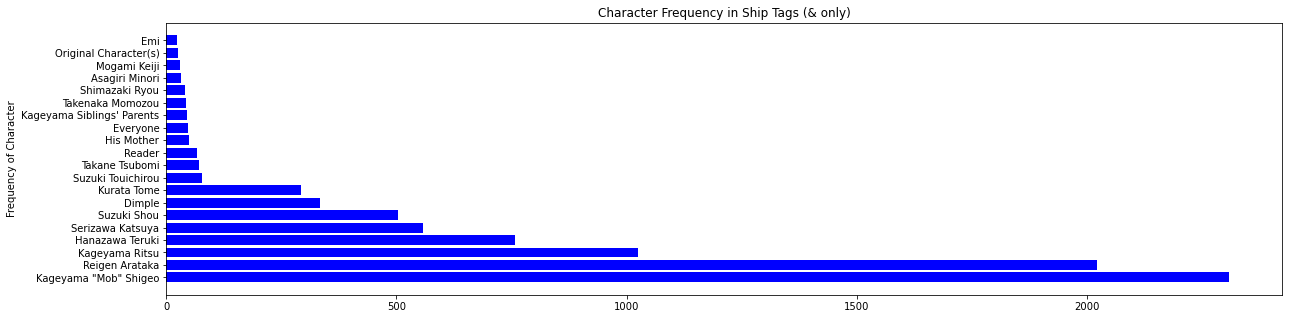

In [86]:
y = [count for tag, count in ctr.most_common(20)]
x = [tag for tag, count in ctr.most_common(20)]

plt.barh(x, y, color='blue')
plt.title("Character Frequency in Ship Tags (& only)")
plt.ylabel("Frequency of Character")
plt.xticks()
plt.show()


In [89]:
# slash only
ctr = Counter(chain(ls_rel_slash))
ctr.most_common(100)



[('Reigen Arataka', 2886),
 ('Kageyama "Mob" Shigeo', 2205),
 ('Serizawa Katsuya', 1590),
 ('Hanazawa Teruki', 1171),
 ('Kageyama Ritsu', 1156),
 ('Suzuki Shou', 744),
 ('Dimple', 437),
 ('Reader', 276),
 ('Shimazaki Ryou', 262),
 ('Kurata Tome', 111),
 ('Takenaka Momozou', 109),
 ('Minegishi Toshiki', 105),
 ('Suzuki Touichirou', 99),
 ('Takane Tsubomi', 98),
 ('Claw Security Guard', 86),
 ('Original Character(s)', 70),
 ('No Romantic Relationship(s)', 62),
 ('Mogami Keiji', 60),
 ('Gouda Musashi', 50),
 ('Emi', 39),
 ('Mezato Ichi', 34),
 ('Other(s)', 32),
 ('Minor or Background Relationship(s)', 30),
 ('Asagiri Minori', 25),
 ('Original Female Character(s)', 22),
 ('Kamuro Shinji', 22),
 ("Kageyama Siblings' Parents", 19),
 ('Onigawara Tenga', 18),
 ('None', 18),
 ('Dimple (Mob Psycho 100)', 17),
 ('Matsuo', 16),
 ('Koyama Megumu', 15),
 ('*q**q**q*', 15),
 ('Sakurai Yuusuke', 14),
 ('Reigen Arataka (Mob Psycho 100)', 13),
 ("Suzuki Shou's Mother", 13),
 ('Kurosaki Rei', 13),
 ('Hat

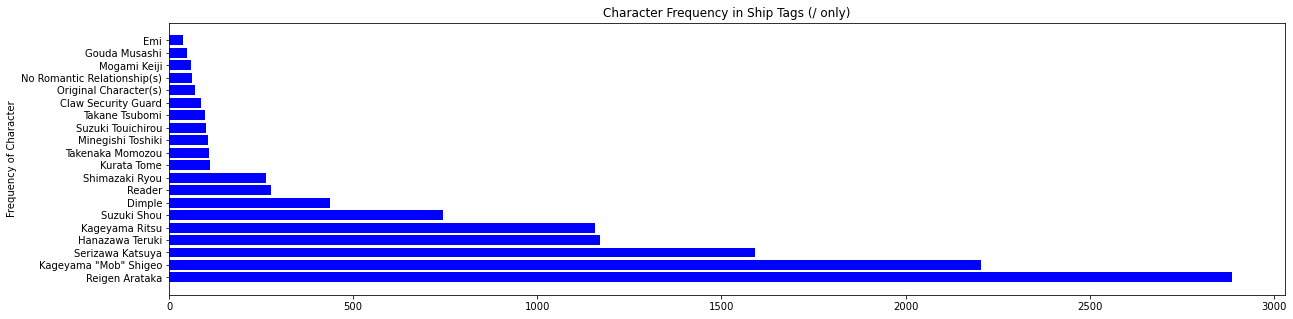

In [84]:
y = [count for tag, count in ctr.most_common(20)]
x = [tag for tag, count in ctr.most_common(20)]

plt.barh(x, y, color='blue')
plt.title("Character Frequency in Ship Tags (/ only)")
plt.ylabel("Frequency of Character")
plt.xticks()
plt.show()

In [25]:
ranking = {'{} with {} works'.format(pair[0], pair[1]): rank+1 for rank, pair in enumerate(ctr.most_common(50))}
ranking

for r in ranking:
    print(ranking[r], r)



1 Reigen Arataka/Serizawa Katsuya with 1386 works
2 Kageyama "Mob" Shigeo & Reigen Arataka with 944 works
3 Hanazawa Teruki/Kageyama "Mob" Shigeo with 920 works
4 Kageyama "Mob" Shigeo/Reigen Arataka with 687 works
5 Kageyama Ritsu/Suzuki Shou with 666 works
6 Kageyama Ritsu & Kageyama "Mob" Shigeo with 504 works
7 Hanazawa Teruki & Kageyama "Mob" Shigeo with 333 works
8 Reigen Arataka & Serizawa Katsuya with 283 works
9 Dimple/Reigen Arataka with 269 works
10 Kageyama Ritsu/Kageyama "Mob" Shigeo with 253 works
11 Kageyama Ritsu & Suzuki Shou with 207 works
12 Hanazawa Teruki & Reigen Arataka with 188 works
13 Reigen Arataka/Reader with 183 works
14 Dimple & Reigen Arataka with 148 works
15 Hanazawa Teruki/Shimazaki Ryou with 139 works
16 Kageyama Ritsu & Reigen Arataka with 135 works
17 Dimple & Kageyama "Mob" Shigeo with 122 works
18 Kurata Tome & Reigen Arataka with 105 works
19 Minegishi Toshiki/Shimazaki Ryou with 79 works
20 Kageyama Ritsu & Hanazawa Teruki with 72 works
21 Kagey

In [26]:
ctr.most_common()[-100:-1]

[('Asagiri Minori & Shimazaki Ryou', 1),
 ('Minegishi Toshiki/Original Characters(s)', 1),
 ('Kamuro Shinji/Original Character(s)', 1),
 ('(IMPLIED)', 1),
 ('Serizawa Katsuya/Original Female Character(s)', 1),
 ('Serizawa Katsuya/Shibata Hiroshi', 1),
 ('Poly Super 5', 1),
 ('cuz im not nasty', 1),
 ('all is platonic', 1),
 ('though maybe some ships are implied', 1),
 ('implied sorta kinda. its fine', 1),
 ('Claw & Serizawa Katsuya (Mob Psycho 100)', 1),
 ('ritshou and serirei are VERY backseat tho', 1),
 ('Mezato Ichi/Takenaka Momozou', 1),
 ('(mentioned--mob isnt actually in this one)', 1),
 ('super five boyfriend squad also', 1),
 ('but its just kinda mentioned', 1),
 ('Asagiri Minori & Emi', 1),
 ("see that '&'*q* yeah*d* no pedo ships in my good christian minecraft server",
  1),
 ('Hoshino Takeshi/Original Female Character(s)', 1),
 ('Hatori Nozomu/Reader', 1),
 ('Kurata Tome/Reader', 1),
 ('Kageyama Ritsu - Relationship', 1),
 ('Joseph/Udo (Mob Psycho 100)', 1),
 ('Joseph/Minegi

In [27]:
# poly relationships frequency counter
d = dict(ctr)
d = {key: d[key] for key in d.keys() if key.count('/') > 1}
sorted(d.items(), key=lambda x:x[1], reverse=True)

[('Dimple/Reigen Arataka/Serizawa Katsuya', 50),
 ('Claw Security Guard/Dimple/Reigen Arataka', 33),
 ('Kageyama Ritsu/Kageyama "Mob" Shigeo/Reigen Arataka', 13),
 ('Claw Security Guard/Dimple/Reigen Arataka/Serizawa Katsuya', 9),
 ('Kageyama Ritsu/Suzuki Shou/Takenaka Momozou', 5),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takenaka Momozou', 5),
 ('Hanazawa Teruki/Kageyama Ritsu/Kageyama "Mob" Shigeo/Suzuki Shou', 4),
 ('Reigen Arataka/Serizawa Katsuya/Reader', 2),
 ('Dimple/Kageyama "Mob" Shigeo/Reigen Arataka', 2),
 ('Kageyama "Mob" Shigeo/Reigen Arataka/Serizawa Katsuya', 2),
 ('Dimple (Mob Psycho 100)/Kageyama "Mob" Shigeo/Reigen Arataka', 2),
 ('Hanazawa Teruki/Kageyama "Mob" Shigeo/Takane Tsubomi', 2),
 ('Dimple/Reigen Arataka/Other(s)', 2),
 ('Dimple/Kageyama Ritsu/Kageyama "Mob" Shigeo/Reigen Arataka', 1),
 ('Hanazawa Teruki/Kageyama Ritsu/Suzuki Shou', 1),
 ('Kageyama "Mob" Shigeo/Reigen Arataka/Takane Tsubomi', 1),
 ('Dimple/Kageyama "Mob" Shigeo/You', 1),
 ('Hanazawa Teruki/

In [28]:
# platonic relationships only
rel_no_slash = rel_only[rel_only['isSlash'] == False]
rel_no_slash


,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,date,numSeries,ffstring
2,Show them who's boss,fallenangel0666,False,False,/works/47351500,G,[Choose Not To Use Archive Warnings],[F/M],False,2023-05-22,...,2,22,0,0,0,0.090909,0.000000,2023-05-22,0,"Self Confidence,Dominance,Jealousy,Established..."
6,Guess it can’t be helped,alternativeaccount,False,False,/works/47096146,T,"[Choose Not To Use Archive Warnings, Graphic D...","[Gen, M/M]",True,2023-05-22,...,15,147,0,0,0,0.102041,0.000000,2023-05-22,0,"werewolf serizawa,reigen doesnt know serizawa ..."
10,Causeway,splendidparrot,False,False,/works/46239952,M,[Choose Not To Use Archive Warnings],[M/M],True,2023-05-21,...,183,1925,87,13,0,0.095065,0.071038,2023-05-21,0,"Coming Out,Getting Together,Aged-Up Character(s)"
12,The End of the World as You Know It,RainCavity,False,False,/works/16716950,T,[No Archive Warnings Apply],[Gen],True,2023-05-21,...,543,16613,308,153,0,0.032685,0.281768,2023-05-21,0,"Canon Compliant,Claw isn't done yet,government..."
15,Defined by the Absence,wyrvel,False,False,/works/43247010,T,[No Archive Warnings Apply],[Gen],True,2023-05-20,...,566,17147,160,158,0,0.033009,0.279152,2023-05-20,0,"Alternate Universe - Canon Divergence,Chronic ..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7047,"Sometimes, it's not a happy ending.",orphan_account,False,True,/works/7757914,T,[Major Character Death],[Gen],False,2016-08-13,...,113,1617,13,5,0,0.069882,0.044248,2016-08-13,0,"hey angst bros this fandom needs more of it,bc..."
7050,Gooze,orphan_account,False,True,/works/7717465,G,[No Archive Warnings Apply],[Gen],False,2016-08-09,...,628,7391,12,64,0,0.084968,0.101911,2016-08-09,0,"obligatory sickfic,Sickfic,uhhhhhhhhh,anti-fas..."
7051,Contentment,wuwu,False,False,/works/7719790,T,[No Archive Warnings Apply],[Gen],False,2016-08-09,...,2114,19033,135,230,1,0.111070,0.108798,2016-08-09,1,"Adoption,reigen is a good guy give him a break..."
7058,Green,Sifl,False,False,/works/7564429,T,[No Archive Warnings Apply],[Gen],False,2016-07-23,...,450,4998,32,45,0,0.090036,0.100000,2016-07-23,1,"Brotherly dynamic,ritsu angst,dammit ritsu,tom..."


In [29]:
sr = str_df[str_df['relationships'].apply(lambda x: 'Reigen Arataka/Serizawa Katsuya' in x)]
sr["comments"].sum()

42922

In [30]:
tm = df[df['relationships'].apply(lambda x: 'Hanazawa Teruki/Kageyama "Mob" Shigeo' in x)]
tm["words"].sum()

8522638

In [31]:
rm = df[df['relationships'].apply(lambda x: 'Kageyama "Mob" Shigeo/Reigen Arataka' in x)]
rm["comments"].sum()

15835

In [32]:
rs = df[df['relationships'].apply(lambda x: 'Kageyama Ritsu/Suzuki Shou'in x)]
rs["comments"].sum()


20914

In [33]:
df["kudos"].sum()

1466434

In [34]:
366948 / 1466434


0.25023151399926624

In [35]:
2172 / 7081


0.3067363366756108

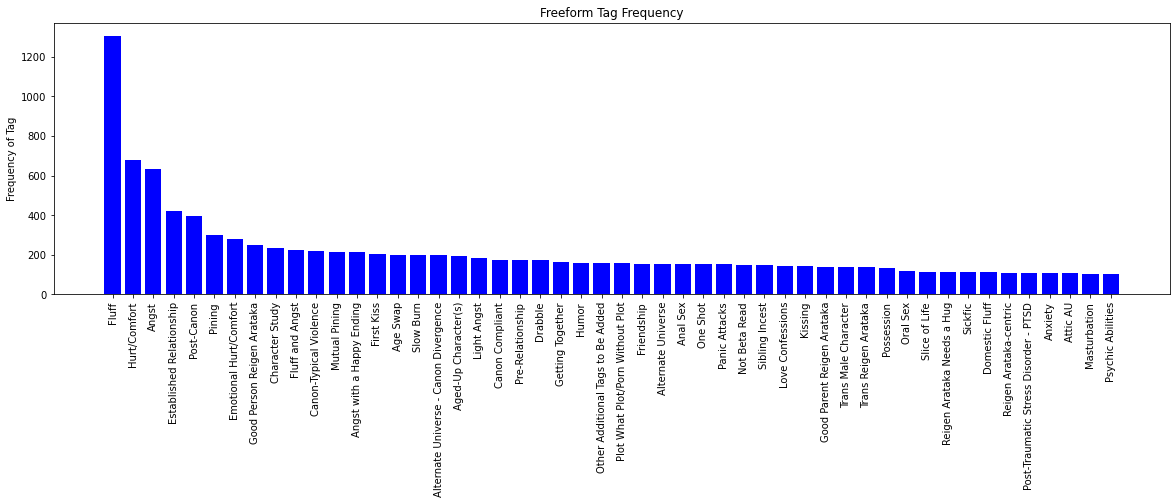

In [36]:
ls_free = df.freeforms.tolist()
ctr = Counter(chain.from_iterable(ls_free))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

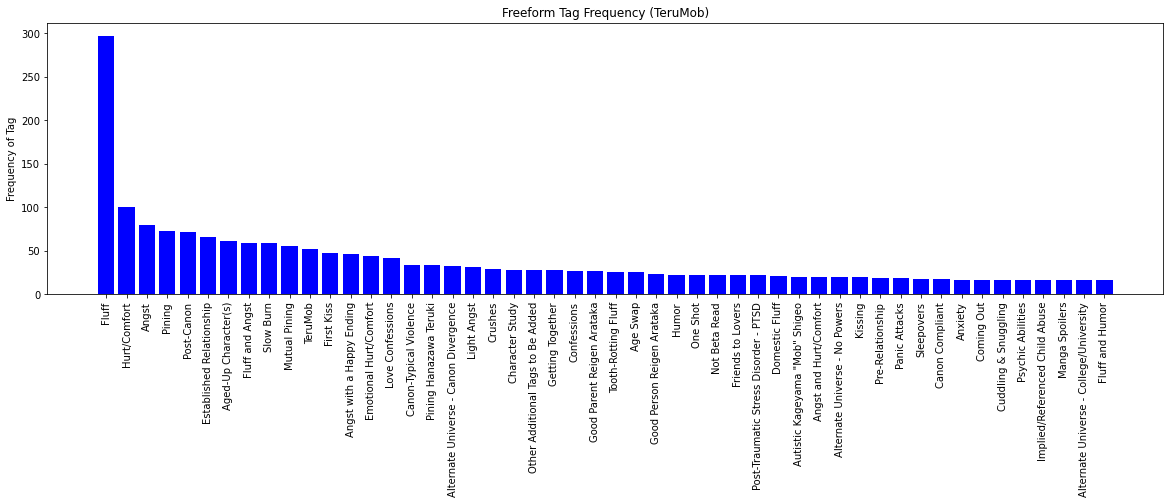

In [37]:
tm_free = tm.freeforms.tolist()
ctr = Counter(chain.from_iterable(tm_free))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency (TeruMob)")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

In [38]:
# authors by word count in mp100
author_words_sum = df[['author','words']].groupby('author').sum()
author_words_sum.sort_values('words', ascending=False)[0:50]

,words
author,
Green_Kneesocks,8082176
orphan_account,1513441
tinkertoysdamn,684669
ToastyToaster22,557219
Anonymous,452228
Phantomrose96,372314
tsukkisaur,369363
shcherbatskayas,344542
toyotas,336922


In [39]:
# authors in mp100
author_words_sum = df[['author'] + numeric_stats].groupby('author').sum()
author_words_sum.sort_values('kudos', ascending=False)[0:50]

,words,kudos,hits,comments,bookmarks,kudos_per_hits
author,,,,,,
orphan_account,1513441,72016,788877,5679,7110,39.107104
tinkertoysdamn,684669,32091,345953,4937,3420,9.158378
Janekfan,264230,29041,323795,1336,1533,14.132892
skeilig,187008,25052,196103,1996,2878,3.799676
ruthwrites,167053,24744,204542,2071,3565,1.802082
BeyondTheClouds777,206003,24698,160461,1380,3316,7.510266
snowtears,301727,23837,249377,2780,2641,4.239904
suitablyskippy,156000,19940,177932,1563,4170,2.274325
W3LTERW8,328676,19515,170923,1408,2129,9.734558


In [40]:
# ritshou main vs ritshou as background (grain of salt with this)
# rs from earlier as all ritshou
# only_rs = rs[rs['relationships'].count("/") == 1]
# i think i need to convert these to multiindices? needs more work here to isolate ritshou
len(sr) / len(df)

0.19432283575766135

In [41]:
# trans seri
import re
str_df[str_df.ffstring.str.contains('Trans Serizawa Katsuya|Trans Male Serizawa Katsuya|Trans Seri|Trans Serizawa', regex=True, flags=re.IGNORECASE)]

,title,author,isAnon,isOrphan,id,rating,warnings,category,isWip,lastUpdated,...,kudos,hits,comments,bookmarks,collections,kudos_per_hits,bookmarks_per_kudos,date,numSeries,ffstring
16,Only With You,Umbrella_Lemons,False,False,/works/47305864,E,[No Archive Warnings Apply],[M/M],False,2023-05-20,...,41,359,6,3,0,0.114206,0.073171,2023-05-20,0,"POV Reigen Arataka,Soft Dom Reigen Arataka,Ser..."
212,Mutual Destruction,Tritrum,False,False,/works/46661461,E,[No Archive Warnings Apply],[No category],True,2023-04-22,...,8,152,0,0,0,0.052632,0.000000,2023-04-22,0,"Dom/sub,Trans Serizawa Katsuya,Praise Kink,Ove..."
491,warm glow,rebelprincelynx,False,False,/works/45578944,T,[No Archive Warnings Apply],[M/M],False,2023-03-08,...,44,568,6,6,0,0.077465,0.136364,2023-03-08,0,"Trans Male Character,Trans Serirei,Trans Reige..."
554,Trial and Error,localscattered,False,False,/works/44027950,T,[Graphic Depictions Of Violence],[M/M],True,2023-02-27,...,110,1409,12,17,0,0.078070,0.154545,2023-02-27,0,Takes place right after Reigen runs from Seriz...
793,whats your story?,viewm0nsterfinn,False,False,/works/44569366,N,[Choose Not To Use Archive Warnings],[No category],False,2023-01-27,...,30,313,4,3,0,0.095847,0.100000,2023-01-27,0,"Implied/Referenced Self-Harm,Talking,Mid-Canon..."
864,Perpetual Mild Illness,WallaceWellls,False,False,/works/44166532,G,[No Archive Warnings Apply],[M/M],True,2023-01-17,...,66,783,18,7,0,0.084291,0.106061,2023-01-17,0,"Chronic Pain,working through internalized able..."
1195,Broccoli Sex,unsleep_nsfw,False,False,/works/43625511,E,[Rape/Non-Con],[M/M],False,2022-12-15,...,9,353,0,0,0,0.025496,0.000000,2022-12-15,0,"vine sex,technically noncon,takes place in dim..."
1449,Reigen’s (Boyfriend Special) Massage,Ollie_writes,False,False,/works/42759315,E,[No Archive Warnings Apply],[M/M],False,2022-10-31,...,142,2515,5,7,0,0.056461,0.049296,2022-10-31,0,"Trans Male Character,Trans Reigen Arataka,Tran..."
1563,Best Birthday Gift Ever,MuffinsInSummer,False,False,/works/42287181,T,"[Choose Not To Use Archive Warnings, No Archiv...",[M/M],False,2022-10-10,...,21,557,1,0,0,0.037702,0.000000,2022-10-10,0,"Psychic Bond,Unplanned Pregnancy,Mpreg,Empath ..."
1765,Putty In My Hands,orphan_account,False,True,/works/40555866,E,[No Archive Warnings Apply],[M/M],False,2022-07-25,...,239,3412,18,25,0,0.070047,0.104603,2022-07-25,1,"Getting Together,First Dates,Drunkenness,Expli..."


In [42]:
# what pct of fics contain fluff
fluff= str_df[str_df.ffstring.str.contains('Fluff', regex=True, flags=re.IGNORECASE)]
len(fluff) / len(df)

0.2704420279621522

<AxesSubplot:xlabel='rating'>

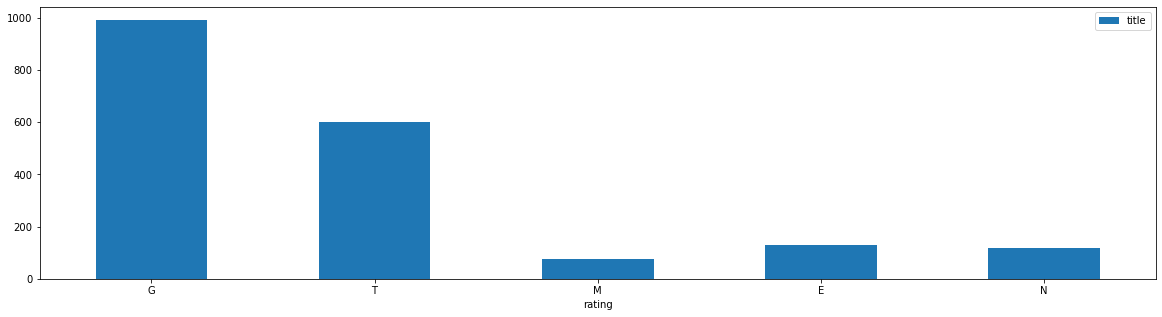

In [43]:
fluff[['title','rating']].groupby(['rating']).count().plot.bar(rot=0)

In [44]:
fluff[numeric_stats].mean()

words             5705.989556
kudos              227.052219
hits              2173.685640
comments            23.523238
bookmarks           24.406789
kudos_per_hits       0.119600
dtype: float64

<AxesSubplot:xlabel='rating'>

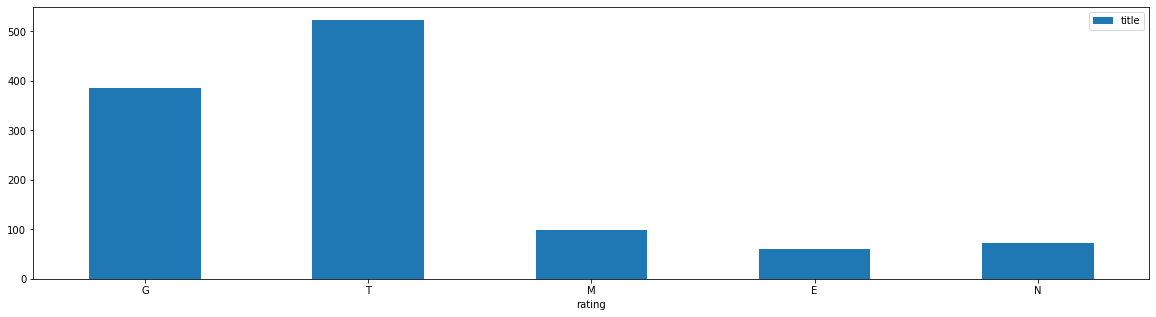

In [45]:
hurt = str_df[str_df.ffstring.str.contains('Hurt', regex=True, flags=re.IGNORECASE)] # switch to percentage of rating
hurt[['title','rating']].groupby(['rating']).count().plot.bar(rot=0)

In [46]:
hurt[numeric_stats].mean()

words             11061.539947
kudos               282.100088
hits               3160.682177
comments             42.188762
bookmarks            38.498683
kudos_per_hits        0.112676
dtype: float64

<AxesSubplot:xlabel='rating'>

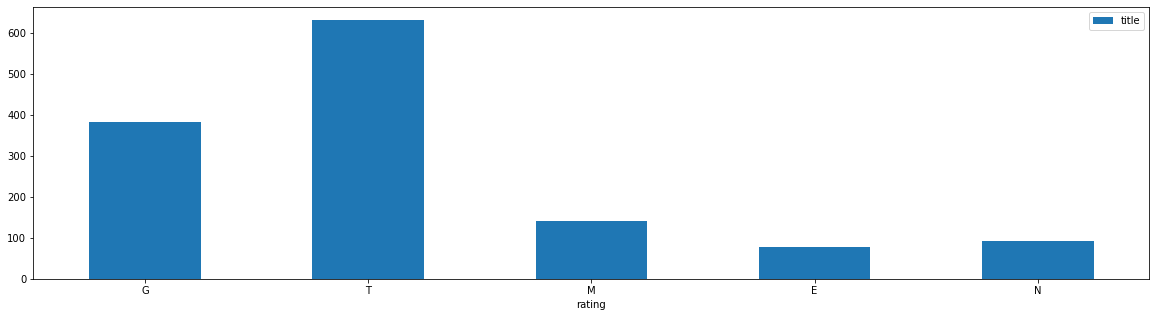

In [47]:
angst = str_df[str_df.ffstring.str.contains('Angst', regex=True, flags=re.IGNORECASE)] #switch to percentage of rating
angst[['title','rating']].groupby(['rating']).count().plot.bar(rot=0)

In [48]:
angst[numeric_stats].mean()

words             9148.850151
kudos              218.010542
hits              2469.918675
comments            34.433735
bookmarks           26.810241
kudos_per_hits       0.105069
dtype: float64

In [49]:
sr[numeric_stats].mean()

words             7214.694041
kudos              266.677326
hits              2760.893895
comments            31.193314
bookmarks           29.003634
kudos_per_hits       0.109858
dtype: float64

In [50]:
str_df[numeric_stats].mean()

words             6596.370428
kudos              207.094196
hits              2183.903827
comments            22.996469
bookmarks           23.259992
kudos_per_hits       0.110377
dtype: float64

In [51]:
trans = str_df[str_df.ffstring.str.contains('Trans', regex=True, flags=re.IGNORECASE)]
len(trans) / len(df)

0.05309984465470979

In [52]:
trans[numeric_stats].mean()

words             6973.117021
kudos              165.595745
hits              2008.941489
comments            20.396277
bookmarks           16.978723
kudos_per_hits       0.094396
dtype: float64

In [53]:
rel_no_slash[numeric_stats].mean()

words             6677.874770
kudos              234.684622
hits              2295.845764
comments            27.928637
bookmarks           31.296961
kudos_per_hits       0.125098
dtype: float64

<AxesSubplot:xlabel='rating'>

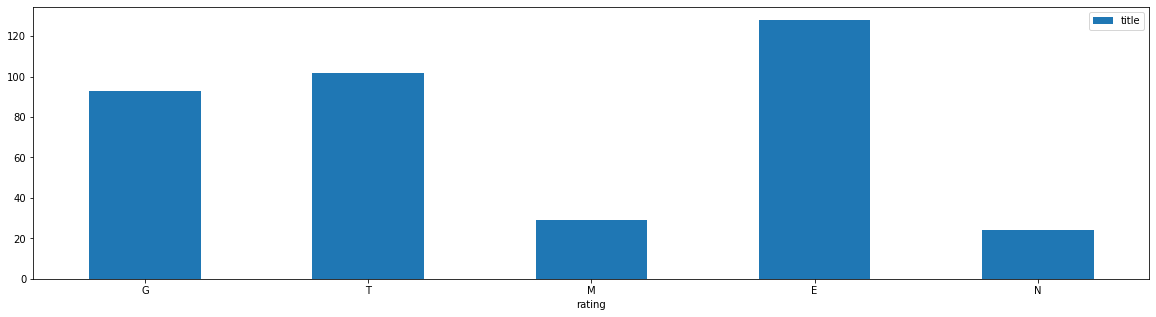

In [54]:
trans[['title','rating']].groupby(['rating']).count().plot.bar(rot=0) # switch to percentage of rating

In [55]:
au = str_df[str_df.ffstring.str.contains('AU', regex=True, flags=re.IGNORECASE)]
len(au) / len(df)

0.19517017370427905

<AxesSubplot:xlabel='rating'>

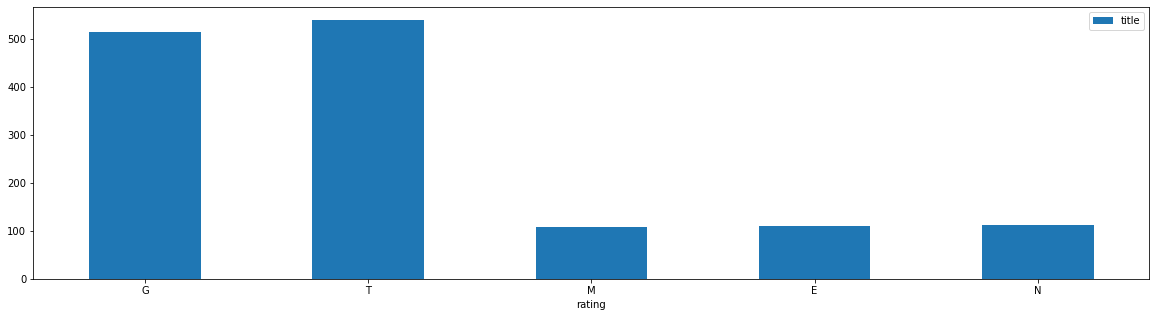

In [56]:
au[['title','rating']].groupby(['rating']).count().plot.bar(rot=0)

In [57]:
ls_freeforms = au.freeforms.to_list()
# this is the jankiest code i've ever written don't tell my mother
au_set = set()
for tag_list in ls_freeforms:
    for tag in tag_list:
        if "au" in tag.lower() and "aut" not in tag.lower() and "aum" not in tag.lower() and "aur" not in tag.lower() and "ause" not in tag.lower() and "ault" not in tag.lower() and "aug" not in tag.lower() and "aud" not in tag.lower() and "aust" not in tag.lower():
            au_set.add(tag)
for a in au_set:
    print(a)

dimple is mobs master au
Based on beanpots' AU on tumblr
not technically an ageswap au but its inspired by one
Age-Swap AU
Claw!Teru AU
Merfolk AU
Reigen doesnt know his apartment is haunted
Same-Age AU
a swan prince au bc i rly love that story
Deathloop AU
Dimple as Mob's Teacher AU
I FUCKING LOVE SOY SAUCE
Halloween AU
not really an au but i mean kind of
ill develop this au more i promise
an AU where Claw doesn't exist
Spirited Away AU
Maid Cafe AU
Rapunzel AU
will lead into an au of canon events
Reader is mob's aunt
AU's for AUs
Demon and Witchcraft AU
Laundry Mistakes
cringe and fail psych ward au
Attic AU
figure skating AU
Angel/Demon AU
domestic AU
Ancient Gods AU
Wig AU
adult au
Robot AU
a tiny bit of takenaka if u actually know the au
Original au
dark au
Vampire AU
Childhood Friends AU
AU: Altered Events
reigen gets super haunted but decides he doesn't have time to deal with it
AU ig but it follows most of the main story line
Underground Fighting Ring AU
the au is more of an ad

<AxesSubplot:xlabel='date,date'>

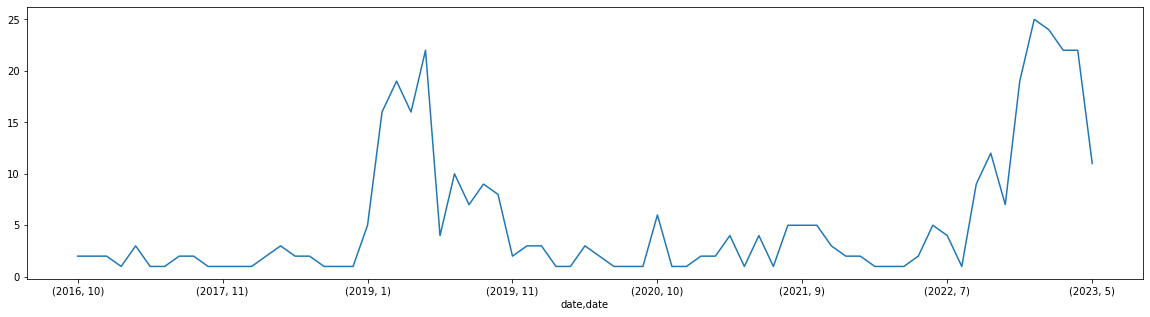

In [58]:
# graph time series trans characters date vs number of works
trans_ts = trans[['date', 'title']].groupby(by=[trans.date.dt.year,trans.date.dt.month])['title']
trans_ts.count().plot()

<AxesSubplot:xlabel='date,date'>

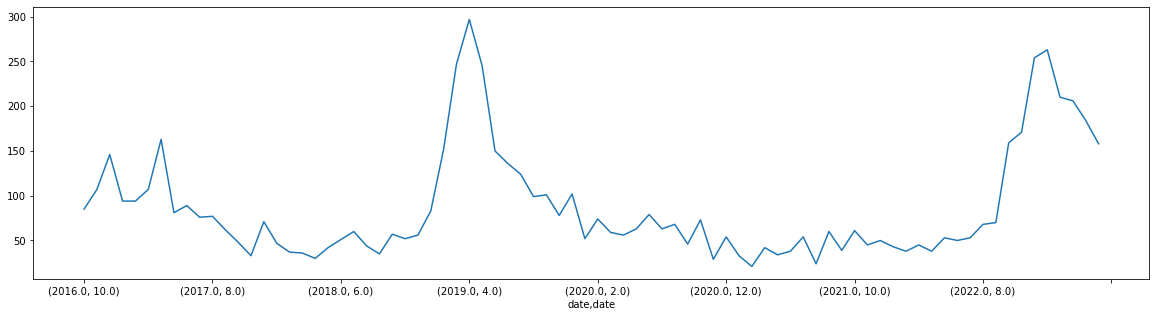

In [59]:
import datetime
post_2016 = df[df['date'] > '2016-10-01']
post_2016 = df[['date', 'title']].groupby(by=[post_2016.date.dt.year, post_2016.date.dt.month])['title']
post_2016.count().plot()

In [60]:
# what pct of fics in jan were tagged trans?
post_2016.count()

date    date
2016.0  10.0     85
        11.0    107
        12.0    146
2017.0  1.0      94
        2.0      94
               ... 
2023.0  1.0     263
        2.0     210
        3.0     206
        4.0     184
        5.0     158
Name: title, Length: 80, dtype: int64

In [61]:
trans_ts.count()

date  date
2016  10       2
      12       2
2017  1        2
      3        1
      4        3
              ..
2023  1       25
      2       24
      3       22
      4       22
      5       11
Name: title, Length: 71, dtype: int64

In [62]:
nb = str_df[str_df.ffstring.str.contains('Nonbinary', regex=True, flags=re.IGNORECASE)]
len(nb) / len(df)

0.010591724332721366

In [63]:
not_minegishi_nb = nb[~nb.ffstring.str.contains('Nonbinary Minegishi Toshiki|Nonbinary Minegishi', regex=True, flags=re.IGNORECASE)]
not_minegishi_nb[['title', 'author', 'id', 'freeforms']]

,title,author,id,freeforms
2844,Something Bad,W3LTERW8,/works/25564741,"[Hook-Up, Pining, LGBTQ Themes, Nonbinary Char..."
2927,Waking You Up,orphan_account,/works/21766069,"[Age Swap AU, This is a rewrite of the 7th div..."
2948,Undercuts,orphan_account,/works/24585385,"[Fluff, Pining, Mutual Pining, Haircuts, Misun..."
3433,swimming with a shark isn’t as scary as you think,distraitLoser,/works/21379699,"[post-claw, Established Relationship, Oceanari..."
3503,Faces in the Crowd,W3LTERW8,/works/21065936,"[Public Sex, Train Sex, Vaginal Fingering, Fin..."
3590,So You Won't See Me Unraveling,W3LTERW8,/works/20730341,"[Trans Male Character, Menstruation, Hurt/Comf..."
3613,So Punk Rock,Felidaeng,/works/20626772,"[Suzuki Shou-centric, Suzuki Shou Has ADHD, sh..."
3808,"Excuses, Excuses",W3LTERW8,/works/19950475,"[Vibrators, Semi-Public Sex, Sex Toys Under Cl..."
4002,Your house is on fire and your children are go...,eggio,/works/18529276,"[Angst, Hurt/Comfort, Past Child Abuse, Implie..."
4102,Haunted House,morosexualserizawa,/works/18965431,"[Haunted Houses, Case Fic, Mutual Pining, Pre-..."


In [64]:
#nsfw stats
m_rated_fics = str_df[str_df['rating'] == 'M']
e_rated_fics = str_df[str_df['rating'] == 'E']

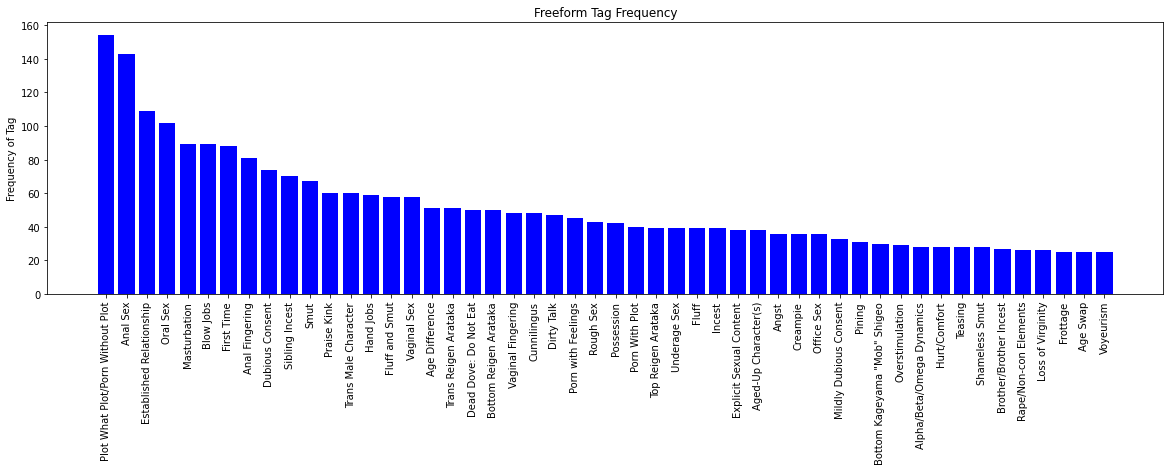

In [65]:
e_rated_fics
e_free = e_rated_fics.freeforms.tolist()
ctr = Counter(chain.from_iterable(e_free))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

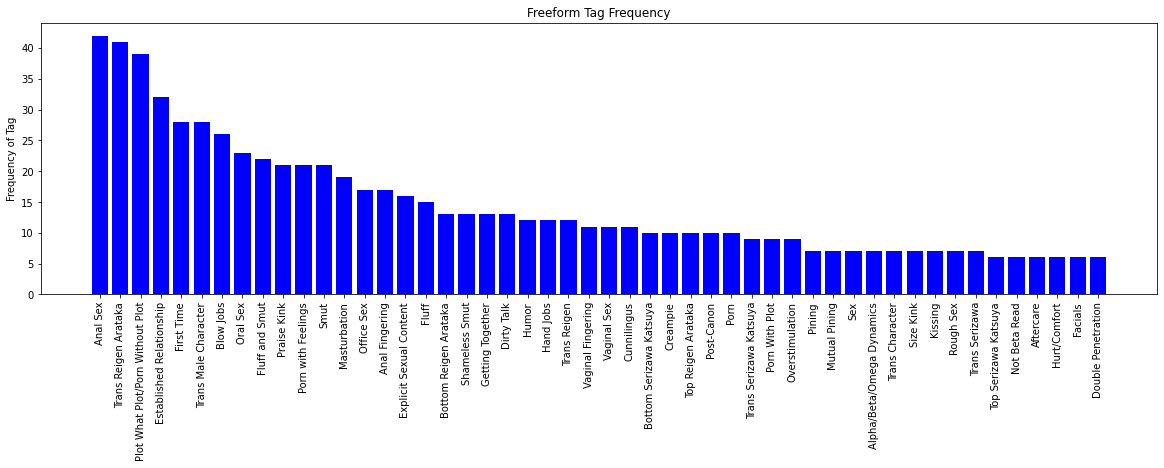

In [66]:
# serirei e-rated only
sr_e_free = sr[sr['rating'] == 'E']
ctr = Counter(chain.from_iterable(sr_e_free.freeforms.tolist()))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

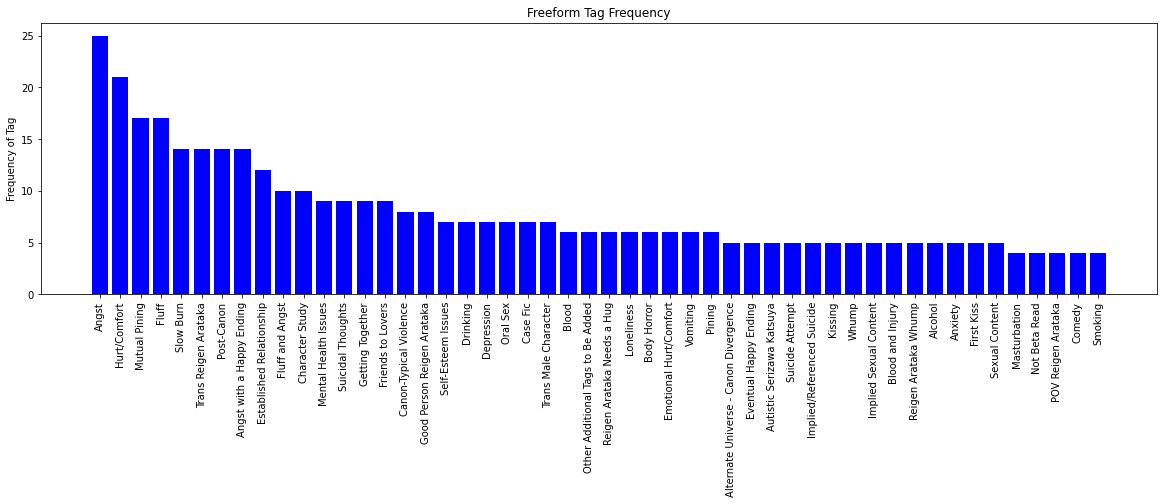

In [67]:
sr_m_free = sr[sr['rating'] == 'M']
ctr = Counter(chain.from_iterable(sr_m_free.freeforms.tolist()))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

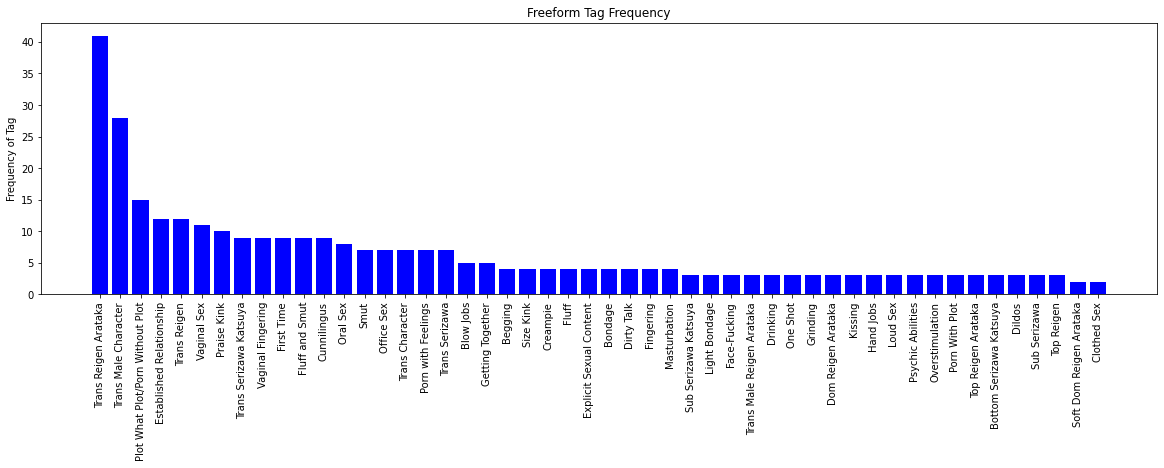

In [68]:
# trans serirei e-rated only
sr_e_trans_free = sr_e_free[sr_e_free.ffstring.str.contains('Trans', regex=True, flags=re.IGNORECASE)].freeforms.tolist()
ctr = Counter(chain.from_iterable(sr_e_trans_free))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()

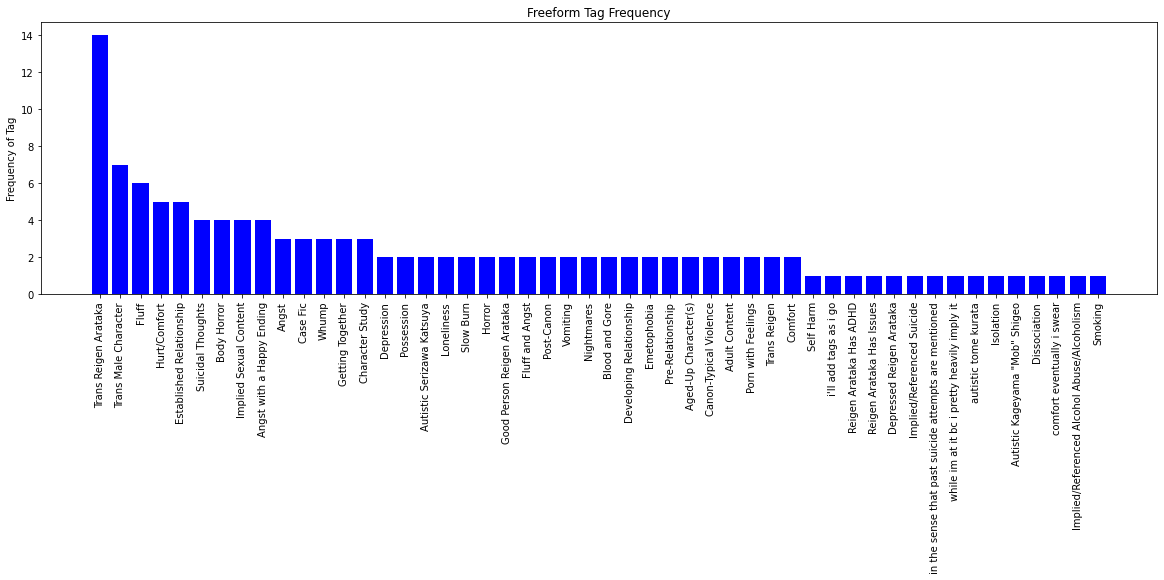

In [69]:
sr_m_trans_free = sr_m_free[sr_m_free.ffstring.str.contains('Trans', regex=True, flags=re.IGNORECASE)].freeforms.tolist()
ctr = Counter(chain.from_iterable(sr_m_trans_free))
ctr.most_common(50)

y = [count for tag, count in ctr.most_common(50)]
x = [tag for tag, count in ctr.most_common(50)]

plt.bar(x, y, color='blue')
plt.title("Freeform Tag Frequency")
plt.ylabel("Frequency of Tag")
plt.xticks(rotation=90)
plt.show()